Herliana Nur Ekawati

NIM 11201038

GRUP M07

dataset: https://www.kaggle.com/datasets/syedjaferk/delhi-weather-dataset

In [ ]:
import pandas as pd
df = pd.read_csv('Delhi_Weather_data.csv')
df

,dt_txt,temp,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,main,description,clouds,wind_speed,wind_degree,date,day,time_of_record
0,2020-01-27 14:30:00+05:30,22.49,21.43,22.49,1012,1012,985,38,Clouds,broken clouds,67,2.35,54,2020-01-27,Monday,14:30:00
1,2020-01-27 17:30:00+05:30,20.34,19.64,20.34,1010,1010,983,42,Clouds,broken clouds,68,2.95,102,2020-01-27,Monday,17:30:00
2,2020-01-27 20:30:00+05:30,17.86,17.51,17.86,1012,1012,985,48,Clouds,scattered clouds,35,2.60,106,2020-01-27,Monday,20:30:00
3,2020-01-27 23:30:00+05:30,16.64,16.64,16.64,1011,1011,984,50,Clouds,broken clouds,66,3.60,109,2020-01-27,Monday,23:30:00
4,2020-01-28 02:30:00+05:30,16.15,16.15,16.15,1010,1010,983,50,Clouds,scattered clouds,32,2.82,59,2020-01-28,Tuesday,02:30:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15241,2021-02-20 02:30:00+05:30,19.62,19.62,19.62,1016,1016,990,24,Clear,clear sky,0,2.04,300,2021-02-20,Saturday,02:30:00
15242,2021-02-20 05:30:00+05:30,18.46,18.46,18.46,1015,1015,990,26,Clear,clear sky,0,1.18,268,2021-02-20,Saturday,05:30:00
15243,2021-02-20 08:30:00+05:30,19.84,19.84,19.84,1017,1017,992,24,Clear,clear sky,0,1.52,276,2021-02-20,Saturday,08:30:00
15244,2021-02-20 11:30:00+05:30,26.47,26.47,26.47,1018,1018,992,16,Clear,clear sky,0,2.22,237,2021-02-20,Saturday,11:30:00


In [ ]:
df.isnull().values.any()

False

In [ ]:
df.isnull().sum()

dt_txt            0
temp              0
temp_min          0
temp_max          0
pressure          0
sea_level         0
grnd_level        0
humidity          0
main              0
description       0
clouds            0
wind_speed        0
wind_degree       0
date              0
day               0
time_of_record    0
dtype: int64

In [ ]:
df['dt_txt']=pd.to_datetime(df['dt_txt'])
df['temp'].fillna(df['temp'].mean(), inplace=True)
df = df[['dt_txt', 'temp']]
df

,dt_txt,temp
0,2020-01-27 14:30:00+05:30,22.49
1,2020-01-27 17:30:00+05:30,20.34
2,2020-01-27 20:30:00+05:30,17.86
3,2020-01-27 23:30:00+05:30,16.64
4,2020-01-28 02:30:00+05:30,16.15
...,...,...
15241,2021-02-20 02:30:00+05:30,19.62
15242,2021-02-20 05:30:00+05:30,18.46
15243,2021-02-20 08:30:00+05:30,19.84
15244,2021-02-20 11:30:00+05:30,26.47


In [ ]:
# mengubah kolom dt_txt menjadi date dan buat df baru bernama citynew
city = df[['dt_txt', 'temp']].copy()
city['date'] = city['dt_txt'].dt.date
citynew = city.drop('dt_txt', axis=1)
citynew.set_index('date', inplace=True)
citynew.head

<bound method NDFrame.head of              temp
date             
2020-01-27  22.49
2020-01-27  20.34
2020-01-27  17.86
2020-01-27  16.64
2020-01-28  16.15
...           ...
2021-02-20  19.62
2021-02-20  18.46
2021-02-20  19.84
2021-02-20  26.47
2021-02-20  29.70

[15246 rows x 1 columns]>

In [ ]:
citynew.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15246 entries, 2020-01-27 to 2021-02-20
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   temp    15246 non-null  float64
dtypes: float64(1)
memory usage: 238.2+ KB


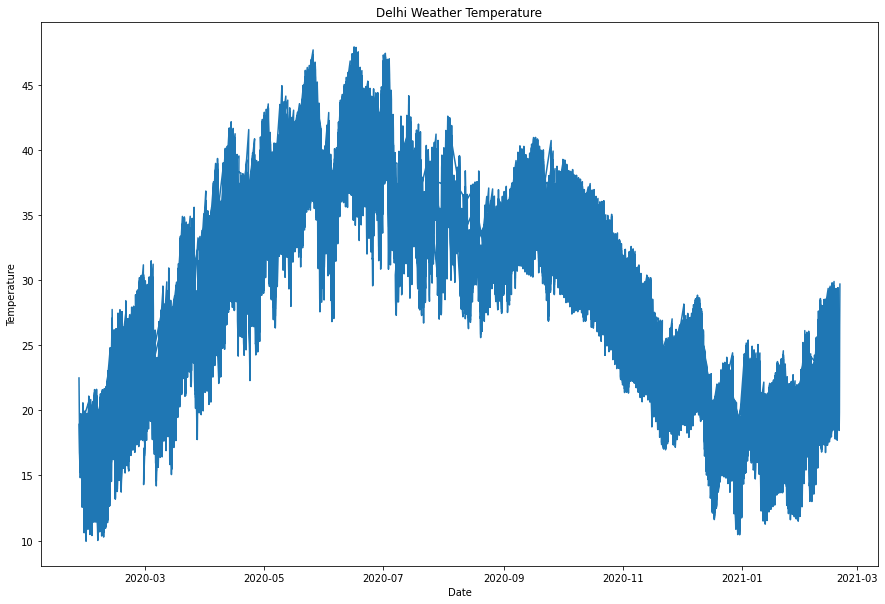

In [ ]:
dates = df['dt_txt'].values
temper = df['temp'].values

import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.plot(dates, temper)
plt.title('Delhi Weather Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.show()

In [ ]:
import tensorflow as tf
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
  series = tf.expand_dims(series, axis=-1)
  ds = tf.data.Dataset.from_tensor_slices(series)
  ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
  ds = ds.flat_map(lambda w: w.batch(window_size +1))
  ds = ds.shuffle(shuffle_buffer)
  ds = ds.map(lambda w: (w[:-1], w[-1:]))
  return ds.batch(batch_size).prefetch(1)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(temper, dates, test_size=0.2, random_state=0, shuffle=False)
print(len(x_train), len(x_test))

12196 3050


In [ ]:
# model
data_x_train = windowed_dataset(x_train, window_size=60, batch_size=100, shuffle_buffer=2000)
data_x_test = windowed_dataset(x_test, window_size=60, batch_size=100, shuffle_buffer=2000)
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(64, return_sequences=True),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(1),
    tf.keras.layers.Lambda(lambda x: x * 400)
])

# optimizer learning rate
lr_sch = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-8, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=['mae'])

In [ ]:
max = df['temp'].max()
print('Max: ', max)
min = df['temp'].min()
print('Min:', min)

Max:  47.92
Min: 9.96


In [ ]:
x = (max-min) * (10/100)
print(x)

3.7960000000000003


In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('mae')<x):
      print("Training dihentikan karena mae <10% dari skala data")
      self.model.stop_training = True

callbacks = myCallback()

In [ ]:
tf.keras.backend.set_floatx('float64')
history = model.fit(data_x_train, epochs=70, 
                    validation_data=data_x_test,
                    callbacks=[callbacks])

Epoch 1/70
122/122 [==============================] - 15s 53ms/step - loss: 81.9039 - mae: 82.4036 - val_loss: 35.9627 - val_mae: 36.4624
Epoch 2/70
122/122 [==============================] - 3s 20ms/step - loss: 26.9682 - mae: 27.4643 - val_loss: 11.0286 - val_mae: 11.5192
Epoch 3/70
122/122 [==============================] - 3s 20ms/step - loss: 12.3192 - mae: 12.8095 - val_loss: 11.1303 - val_mae: 11.6213
Epoch 4/70
122/122 [==============================] - 3s 20ms/step - loss: 11.3819 - mae: 11.8710 - val_loss: 11.2494 - val_mae: 11.7404
Epoch 5/70
122/122 [==============================] - 3s 20ms/step - loss: 10.6653 - mae: 11.1532 - val_loss: 11.3348 - val_mae: 11.8259
Epoch 6/70
122/122 [==============================] - 3s 20ms/step - loss: 10.0549 - mae: 10.5419 - val_loss: 11.3837 - val_mae: 11.8748
Epoch 7/70
122/122 [==============================] - 3s 20ms/step - loss: 9.5318 - mae: 10.0178 - val_loss: 11.3677 - val_mae: 11.8586
Epoch 8/70
122/122 [=====================

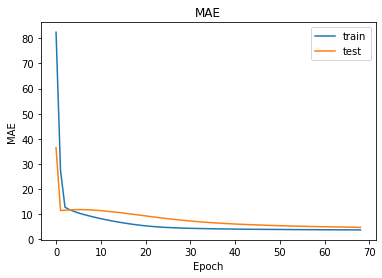

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

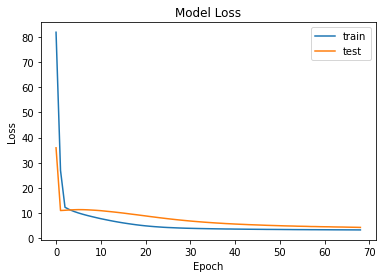

In [ ]:
# plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc='upper right')
plt.show()